In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("enronSpamSubset.csv")

In [3]:
df.sample(5)

,Unnamed: 0.1,Unnamed: 0,Body,Label
9824,29389,29389,"Subject: napoleonville land\n louise ,\n relia...",0
2619,4128,4128,Subject: are you struggleing with stress\n to ...,1
411,10645,10645,Subject: \n why p 9 uay foiwr pporn [ ?\n ans ...,1
9326,26835,26835,Subject: global operations forum 2000\n sally ...,0
3546,394,394,Subject: [ ilug - social ] re : take the steps...,1


In [124]:
df.shape

(9687, 6)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0.1  10000 non-null  int64 
 1   Unnamed: 0    10000 non-null  int64 
 2   Body          10000 non-null  object
 3   Label         10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [6]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Body', 'Label'], dtype='object')

In [7]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)

In [8]:
df.rename(columns={'Label':'target','Body':'text'},inplace=True)

In [9]:
# from sklearn.preprocessing import LabelEncoder
# encoder=LabelEncoder()
# df['target']=encoder.fit_transform(df['target'])

In [10]:
df.sample(5)

,text,target
2524,Subject: you don _ t know how to attract custo...,1
9044,"Subject: var\n david ,\n during today ' s var ...",0
9564,Subject: july 4 th pictures\n farmers / wylies...,0
2727,"Subject: 38 , 861 , 792 orders filled & counti...",1
8226,Subject: your job application to enron researc...,0


In [11]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [12]:
df.duplicated().sum()

313

In [13]:
df=df.drop_duplicates(keep='first')

## EDA

In [92]:
display(df['target'].value_counts())

target
0    4927
1    4760
Name: count, dtype: int64

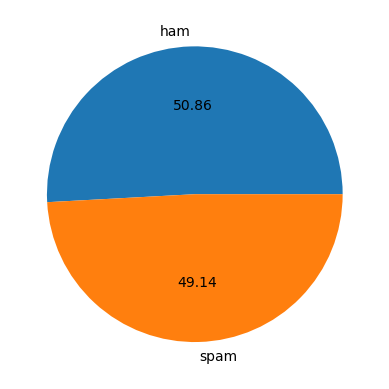

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [54]:
import nltk


In [58]:
df['num_characters']=df['text'].apply(len)

In [60]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [62]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [64]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SUBHRANIL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [66]:
df.sample(5)

,text,target,num_characters,num_words,num_sentence
2694,Subject: meds and pills prescribed online and ...,1,1276,193,9
3148,Subject: convenient refills for viagra - satis...,1,329,69,8
2931,Subject: failure notice\n hi . this is the qma...,1,2132,536,59
6583,Subject: re : extreme value theory applied to ...,0,1250,232,10
4931,Subject: free merchant account information xax...,1,590,118,11


In [68]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,9687.000000,9687.000000,9687.000000
mean,1533.592753,312.492722,18.937648
std,3922.609088,775.975772,57.734667
min,10.000000,2.000000,1.000000
25%,353.000000,73.000000,5.000000
50%,719.000000,152.000000,10.000000
75%,1573.000000,328.000000,19.000000
max,121502.000000,23345.000000,3093.000000


In [70]:
# for ham emails
df[df['target']==0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4927.000000,4927.000000,4927.000000
mean,1715.634057,358.443272,19.242135
std,5123.233206,1013.961367,60.636099
min,17.000000,3.000000,1.000000
25%,353.500000,74.000000,4.000000
50%,800.000000,173.000000,9.000000
75%,1705.500000,368.000000,18.000000
max,121502.000000,23345.000000,1511.000000


In [72]:
# for spam emails
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4760.000000,4760.000000,4760.000000
mean,1345.164706,264.930042,18.622479
std,2019.530058,396.091887,54.573805
min,10.000000,2.000000,1.000000
25%,353.000000,72.000000,5.000000
50%,660.000000,136.000000,10.000000
75%,1388.000000,275.250000,20.000000
max,28432.000000,6131.000000,3093.000000


In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\SUBHRANIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SUBHRANIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


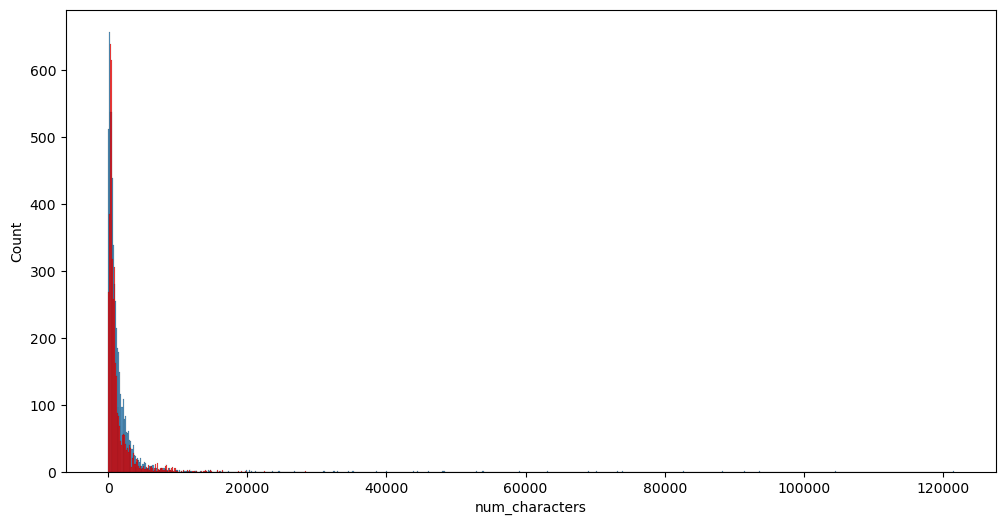

In [76]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')
plt.show()

C:\Users\SUBHRANIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SUBHRANIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\SUBHRANIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


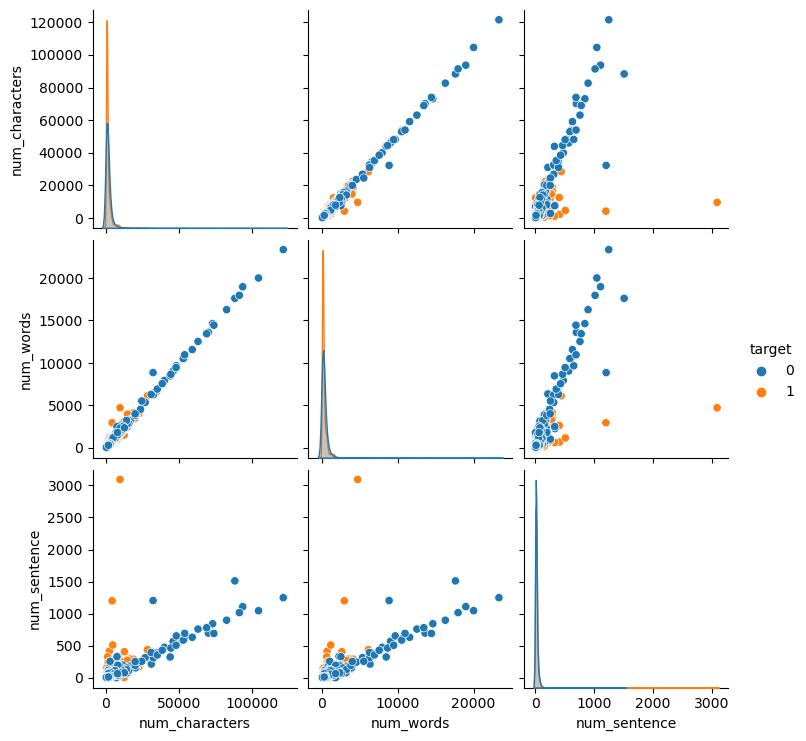

In [78]:
sns.pairplot(df,hue='target')
plt.show()

<Axes: >

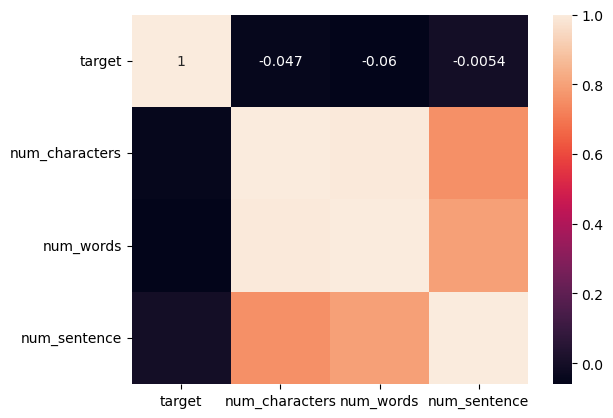

In [80]:
sns.heatmap(df.drop(columns=['text']).corr(),annot=True)

## Text Preprocessing

In [82]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [84]:
import string
from nltk.corpus import stopwords

In [86]:
def transform_text(text):
  text=text.lower()
  text=nltk.word_tokenize(text)
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)  #for removing special characters and punctuations and words with digits
  text=y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text=y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)



In [88]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUBHRANIL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
df['transformed text']=df['text'].apply(transform_text)

In [91]:
df.sample(5)

,text,target,num_characters,num_words,num_sentence,transformed text
1348,Subject: here is your ciaiis\n it ' s a beauti...,1,464,94,10,subject ciaii beauti day today clali softtab g...
8331,Subject: executive committee\n with the format...,0,593,101,6,subject execut committe format manag committe ...
670,"Subject: she is shocked\n hello , welcome to m...",1,490,84,3,subject shock hello welcom meteor medzonlin sh...
2787,Subject: picks from analyst with high - level ...,1,3021,592,36,subject pick analyst high level precis wysak p...
5710,Subject: fw : status\n please advise .\n - - -...,0,1987,449,24,subject fw statu pleas advis origin messag bro...


In [96]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [98]:
spam_wc=wc.generate(df[df['target']==1]['transformed text'].str.cat(sep=' '))

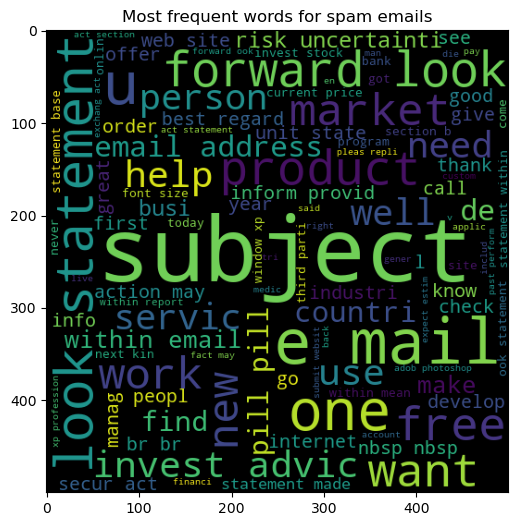

In [100]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title("Most frequent words for spam emails")
plt.show()

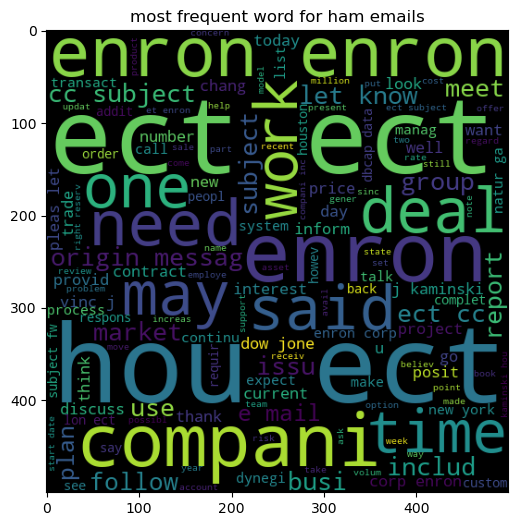

In [102]:
ham_wc=wc.generate(df[df['target']==0]['transformed text'].str.cat(sep=' '))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.title('most frequent word for ham emails')
plt.show()

In [104]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

print(len(spam_corpus))

655382


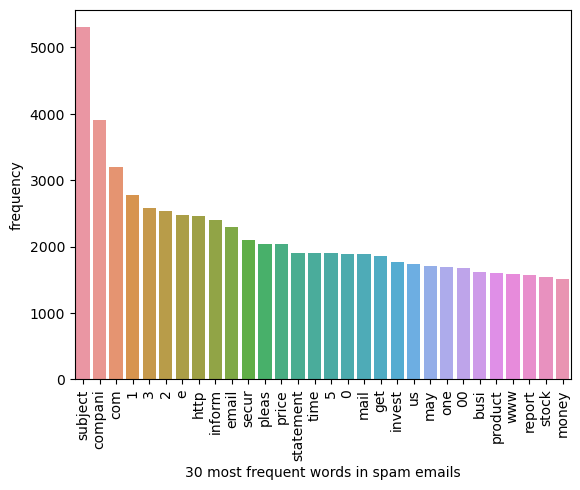

In [106]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel("30 most frequent words in spam emails")
plt.ylabel("frequency")
plt.show()

In [108]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

print(len(ham_corpus))

863303


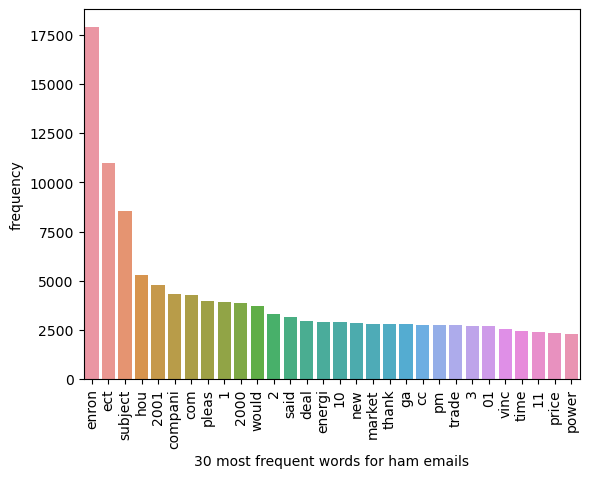

In [110]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel("30 most frequent words for ham emails")
plt.ylabel("frequency")
plt.show()

## Modelling

In [112]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [114]:
# X=tfidf.fit_transform(df['transformed text']).toarray()
# y=df['target'].values

X=cv.fit_transform(df['transformed text']).toarray()
y=df['target'].values

In [116]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [118]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [120]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)

In [122]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.9819401444788441
[[951  13]
 [ 22 952]]
0.9865284974093265


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
# Congratulations! You've won a $1,000,000 prize. Reply to claim.

# URGENT!!! Your bank account has been compromised. Verify your details now.

# Free iPhone 15 offer! Click this link to get your free gift.

# You have a limited time offer for an exclusive 90% discount. Don't miss out.

# Lose 10 pounds in 10 days! This one weird trick will shock you.

# WARNING: Your credit card payment is overdue. Click to pay immediately.

# Hello, I am a Prince in need of help. Please transfer $5,000 to my account.

# Download our app and get a free $500 gift card. Limited time only.

# We've selected you for a special promotion. Claim your prize here.

# You have a new message from a secret admirer. Click here to read it.

In [ ]:
df.shape

In [ ]:
df.head()